# Análise Exploratória dos Dados

Este notebook tem como objetivo realizar uma análise exploratória completa dos dados, incluindo:

- Importação e carregamento dos dados
- Análise da estrutura e qualidade dos dados
- Estatísticas descritivas
- Visualizações gráficas
- Identificação de padrões e outliers
- Análise de correlações

A análise exploratória é fundamental para entender melhor o dataset antes de aplicar modelos de machine learning ou realizar análises mais avançadas.

## 1. Importação das Bibliotecas

Importamos as bibliotecas essenciais para análise exploratória de dados:

In [1]:
# Bibliotecas para manipulação e análise de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configurações de warnings
import warnings
warnings.filterwarnings('ignore')

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 2. Carregamento dos Dados

Carregamos o dataset especificando o caminho e formato do arquivo:

In [2]:
# Carregamento com transposição necessária
df_candidatos = pd.read_json('../data/applicants.json', encoding='utf-8').T
df_entrevistas = pd.read_json('../data/prospects.json', encoding='utf-8').T  
df_vagas = pd.read_json('../data/vagas.json', encoding='utf-8').T

# Verificar se ficou correto
print("=== APÓS TRANSPOSIÇÃO ===")
print(f"Candidatos: {df_candidatos.shape}")  # Deve ser (42482, 7)
print(f"Entrevistas: {df_entrevistas.shape}")  # Deve ser (14222, 3)
print(f"Vagas: {df_vagas.shape}")  # Deve ser (14081, 3)

# Para análise principal, vamos usar o dataset de candidatos
df = df_candidatos.copy()

print(f"\nDataset principal (candidatos) carregado com sucesso!")
print(f"Número de linhas: {len(df)}")
print(f"Número de colunas: {len(df.columns)}")

# Exibir informações dos outros datasets
print(f"\n=== INFORMAÇÕES DOS DATASETS ===")
print(f"Candidatos - Colunas: {list(df_candidatos.columns)}")
print(f"Entrevistas - Colunas: {list(df_entrevistas.columns)}")
print(f"Vagas - Colunas: {list(df_vagas.columns)}")

=== APÓS TRANSPOSIÇÃO ===
Candidatos: (42482, 7)
Entrevistas: (14222, 3)
Vagas: (14081, 3)

Dataset principal (candidatos) carregado com sucesso!
Número de linhas: 42482
Número de colunas: 7

=== INFORMAÇÕES DOS DATASETS ===
Candidatos - Colunas: ['infos_basicas', 'informacoes_pessoais', 'informacoes_profissionais', 'formacao_e_idiomas', 'cargo_atual', 'cv_pt', 'cv_en']
Entrevistas - Colunas: ['titulo', 'modalidade', 'prospects']
Vagas - Colunas: ['informacoes_basicas', 'perfil_vaga', 'beneficios']


## 3. Visualização Inicial dos Dados

Vamos examinar as primeiras e últimas linhas do dataset para entender sua estrutura:

In [3]:
# Primeiras 5 linhas do dataset
print("Primeiras 5 linhas:")
print("=" * 50)

# Para dados JSON transpostos, pode ser necessário resetar o índice
df_clean = df.reset_index(drop=True)
display(df_clean.head())

print("\n" + "=" * 50)
print("Últimas 5 linhas:")
print("=" * 50)
display(df_clean.tail())

# Amostra aleatória
print("\n" + "=" * 50)
print("Amostra aleatória de 5 linhas:")
print("=" * 50)
display(df_clean.sample(5))

Primeiras 5 linhas:


,infos_basicas,informacoes_pessoais,informacoes_profissionais,formacao_e_idiomas,cargo_atual,cv_pt,cv_en
0,"{'telefone_recado': '', 'telefone': '(11) 9704...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},assistente administrativo\n\n\nsantosbatista\n...,
1,"{'telefone_recado': '', 'telefone': '(11) 9372...",{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Analista Administrati...,{'nivel_academico': 'Ensino Superior Incomplet...,{},formação acadêmica\nensino médio (2º grau) em ...,
2,"{'telefone_recado': '', 'telefone': '(11) 9239...",{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Administrativo | Fina...,{'nivel_academico': 'Ensino Superior Completo'...,{},objetivo: área administrativa | financeira\n\n...,
3,"{'telefone_recado': '', 'telefone': '(11) 9810...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Área administrativa',...",{'nivel_academico': 'Ensino Superior Incomplet...,{},formação\nensino médio completo\ninformática i...,
4,"{'telefone_recado': '', 'telefone': '(11) 9251...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},última atualização em 09/11/2021\n­ sp\n\nensi...,



Últimas 5 linhas:


,infos_basicas,informacoes_pessoais,informacoes_profissionais,formacao_e_idiomas,cargo_atual,cv_pt,cv_en
42477,"{'telefone_recado': '', 'telefone': '(11) 9262...",{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Crm / Líder de Projet...,"{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},,
42478,"{'telefone_recado': '', 'telefone': '(41) 9300...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Crm', 'area_atuacao':...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},,
42479,"{'telefone_recado': '', 'telefone': '(11) 9783...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Crm', 'area_atuacao':...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},,
42480,"{'telefone_recado': '', 'telefone': '(61) 9680...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Crm', 'area_atuacao':...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},,
42481,"{'telefone_recado': '', 'telefone': '(15) 9563...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Crm', 'area_atuacao':...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},,



Amostra aleatória de 5 linhas:


,infos_basicas,informacoes_pessoais,informacoes_profissionais,formacao_e_idiomas,cargo_atual,cv_pt,cv_en
41867,"{'telefone_recado': '', 'telefone': '(11) 9173...","{'data_aceite': '25/05/2023 12:24', 'nome': 'D...",{'titulo_profissional': 'Gerente de Governança...,"{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},\n\n\ncontato\ngestora de governança e proc...,
21787,"{'telefone_recado': '', 'telefone': '(11) 9993...",{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'PMO/Analista de Proje...,{'nivel_academico': 'Ensino Superior Completo'...,{},resumo das qualificações\n\ncoordenadora de pr...,
21884,"{'telefone_recado': '', 'telefone': '(21) 9421...",{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Analista-Desenvolvedo...,"{'nivel_academico': 'Pós Graduação Completo', ...",{},\n\nqualificações\nprofissional experiente e d...,
6758,"{'telefone_recado': '', 'telefone': '(62) 9425...","{'data_aceite': '17/11/2022 10:38', 'nome': 'D...","{'titulo_profissional': 'Desenvolvedor', 'area...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},formação acadêmica\n\nuniversidade federal de ...,
7403,"{'telefone_recado': '', 'telefone': '(19) 9323...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'SQL server', 'area_at...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},,


## 4. Informações Básicas do Dataset

Vamos analisar a estrutura, dimensões e tipos de dados:

In [4]:
# Informações gerais do dataset
print("INFORMAÇÕES GERAIS DO DATASET")
print("=" * 50)
print(f"Dimensões: {df.shape}")
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")
print(f"Tamanho total: {df.size}")
print(f"Uso de memória: {df.memory_usage().sum()} bytes")

print("\n" + "=" * 50)
print("TIPOS DE DADOS")
print("=" * 50)
print(df.dtypes)

print("\n" + "=" * 50)
print("NOMES DAS COLUNAS")
print("=" * 50)
print(list(df.columns))

print("\n" + "=" * 50)
print("INFORMAÇÕES DETALHADAS")
print("=" * 50)
df.info()

INFORMAÇÕES GERAIS DO DATASET
Dimensões: (42482, 7)
Número de linhas: 42482
Número de colunas: 7
Tamanho total: 297374
Uso de memória: 3775656 bytes

TIPOS DE DADOS
infos_basicas                object
informacoes_pessoais         object
informacoes_profissionais    object
formacao_e_idiomas           object
cargo_atual                  object
cv_pt                        object
cv_en                        object
dtype: object

NOMES DAS COLUNAS
['infos_basicas', 'informacoes_pessoais', 'informacoes_profissionais', 'formacao_e_idiomas', 'cargo_atual', 'cv_pt', 'cv_en']

INFORMAÇÕES DETALHADAS
<class 'pandas.core.frame.DataFrame'>
Index: 42482 entries, 31000 to 5999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   infos_basicas              42482 non-null  object
 1   informacoes_pessoais       42482 non-null  object
 2   informacoes_profissionais  42482 non-null  object
 3   formacao_e_idi

## 5. Análise de Valores Ausentes

Identificamos e visualizamos valores ausentes no dataset:

ANÁLISE DE VALORES AUSENTES
Resumo de valores ausentes por coluna:


,Coluna,Valores Ausentes,Percentual (%)
0,infos_basicas,2064,4.858528
1,informacoes_pessoais,2196,5.169248
2,informacoes_profissionais,2117,4.983287
3,formacao_e_idiomas,2125,5.002119
4,cargo_atual,2028,4.773787
5,cv_pt,2126,5.004472
6,cv_en,1979,4.658444


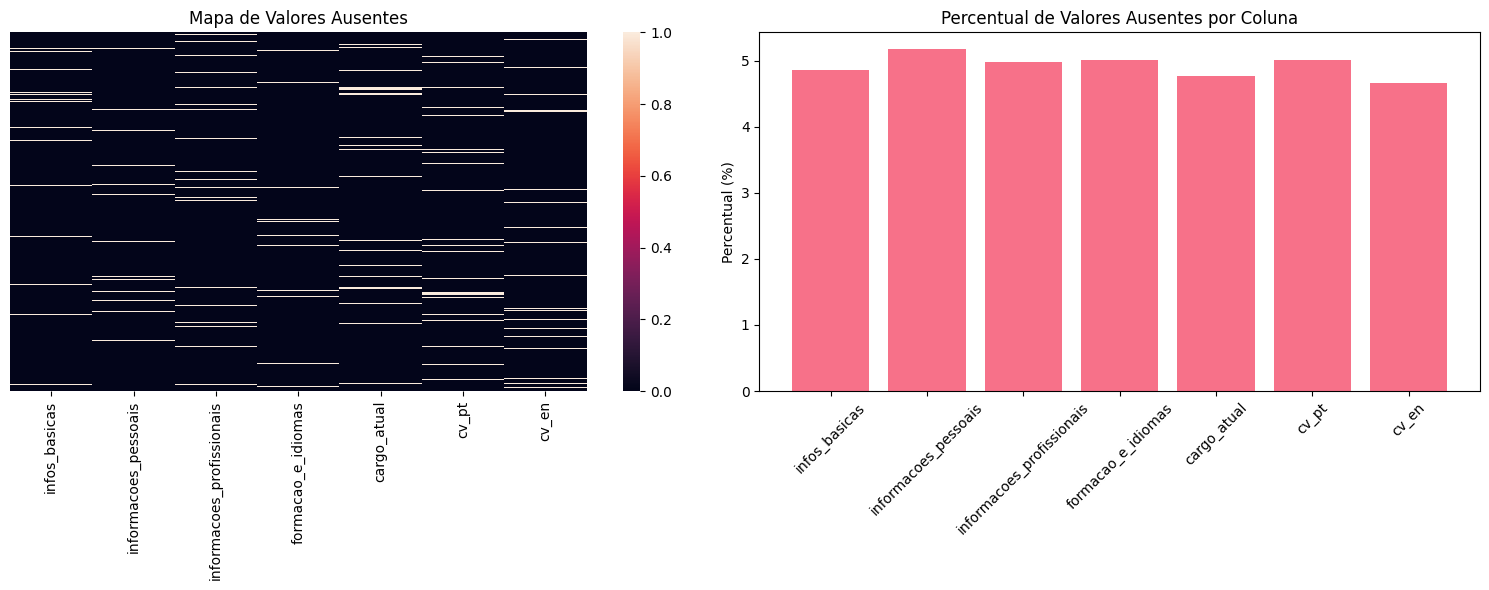

In [5]:
# Adicionar alguns valores ausentes para demonstração
df_missing = df.copy()
# Inserir alguns NaN aleatoriamente
np.random.seed(42)
mask = np.random.random(df_missing.shape) < 0.05  # 5% de valores ausentes
df_missing = df_missing.mask(mask)

# Análise de valores ausentes
print("ANÁLISE DE VALORES AUSENTES")
print("=" * 50)

# Contagem de valores ausentes
missing_count = df_missing.isnull().sum()
missing_percent = (df_missing.isnull().sum() / len(df_missing)) * 100

missing_data = pd.DataFrame({
    'Coluna': missing_count.index,
    'Valores Ausentes': missing_count.values,
    'Percentual (%)': missing_percent.values
})

print("Resumo de valores ausentes por coluna:")
display(missing_data[missing_data['Valores Ausentes'] > 0])

# Visualização de valores ausentes
if missing_data['Valores Ausentes'].sum() > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Heatmap de valores ausentes
    sns.heatmap(df_missing.isnull(), cbar=True, yticklabels=False, ax=axes[0])
    axes[0].set_title('Mapa de Valores Ausentes')
    
    # Gráfico de barras
    missing_data_plot = missing_data[missing_data['Valores Ausentes'] > 0]
    if len(missing_data_plot) > 0:
        axes[1].bar(missing_data_plot['Coluna'], missing_data_plot['Percentual (%)'])
        axes[1].set_title('Percentual de Valores Ausentes por Coluna')
        axes[1].set_ylabel('Percentual (%)')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("✅ Não há valores ausentes no dataset!")

## 6. Estatísticas Descritivas

Analisamos as medidas de tendência central e dispersão das variáveis:

In [6]:
# 6. Estatísticas Descritivas - CORRIGIDO PARA DADOS ANINHADOS

# Primeiro, vamos verificar os tipos de dados atuais
print("VERIFICAÇÃO DOS TIPOS DE DADOS")
print("=" * 50)
print("Tipos atuais:")
print(df.dtypes)
print(f"\nPrimeiras linhas para inspeção:")
display(df.head())

# Identificar quais colunas devem ser numéricas
print("\n" + "=" * 50)
print("CONVERTENDO TIPOS DE DADOS")
print("=" * 50)

# Tentar identificar colunas numéricas automaticamente
potential_numeric_cols = []
for col in df.columns:
    sample_values = df[col].dropna().head(100)
    try:
        # Tentar converter uma amostra
        pd.to_numeric(sample_values, errors='raise')
        potential_numeric_cols.append(col)
        print(f"✅ {col} pode ser convertida para numérico")
    except:
        print(f"❌ {col} permanece como texto")

# Converter colunas identificadas como numéricas
if potential_numeric_cols:
    for col in potential_numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"Convertida: {col}")
else:
    print("⚠️ Nenhuma coluna numérica identificada automaticamente")

# Verificar tipos após conversão
print(f"\nTipos após conversão:")
print(df.dtypes)

# Agora tentar as estatísticas descritivas
print("\n" + "=" * 50)
print("ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS")
print("=" * 50)

numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print(f"Variáveis numéricas encontradas: {list(numeric_cols)}")
    display(df[numeric_cols].describe())
else:
    print("❌ Ainda não há variáveis numéricas no dataset")
    print("Vamos analisar algumas colunas manualmente:")
    
    # Mostrar amostra de cada coluna para análise manual
    for col in df.columns[:5]:  # Primeiras 5 colunas
        print(f"\n{col}:")
        print(f"  Tipo: {df[col].dtype}")
        print(f"  Amostra: {list(df[col].dropna().head(3))}")
        
        # Calcular valores únicos de forma segura
        try:
            unique_count = df[col].nunique()
            print(f"  Valores únicos: {unique_count}")
        except TypeError:
            # Para colunas com dicionários, contar strings únicas
            string_values = df[col].astype(str)
            unique_count = string_values.nunique()
            print(f"  Valores únicos (como string): {unique_count}")

print("\n" + "=" * 50)
print("ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS CATEGÓRICAS")
print("=" * 50)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    
    # Verificar se a coluna contém dicionários
    try:
        value_counts = df[col].value_counts().head()
        print(value_counts)
        
        # Calcular valores únicos de forma segura
        try:
            unique_count = df[col].nunique()
            print(f"Valores únicos: {unique_count}")
        except TypeError:
            # Para colunas com dicionários
            string_values = df[col].astype(str)
            unique_count = string_values.nunique()
            print(f"Valores únicos (como string): {unique_count}")
            
    except Exception as e:
        print(f"⚠️ Erro ao analisar {col}: {str(e)}")
        print("Esta coluna contém dados estruturados complexos")
        
        # Análise alternativa para dados estruturados
        print(f"Tentando análise alternativa...")
        try:
            # Converter para string e analisar
            string_series = df[col].astype(str)
            value_counts = string_series.value_counts().head()
            print("Top 5 padrões mais comuns:")
            for i, (value, count) in enumerate(value_counts.items()):
                # Truncar strings muito longas
                truncated_value = value[:100] + "..." if len(value) > 100 else value
                print(f"  {i+1}. ({count}x): {truncated_value}")
            
            print(f"Padrões únicos: {string_series.nunique()}")
        except Exception as e2:
            print(f"❌ Falha na análise alternativa: {str(e2)}")

# Se ainda não tiver variáveis numéricas, vamos tentar conversão manual
if len(numeric_cols) == 0:
    print("\n" + "=" * 50)
    print("TENTATIVA DE CONVERSÃO MANUAL")
    print("=" * 50)
    
    # Definir possíveis colunas numéricas baseadas em nomes comuns
    possible_numeric = ['idade', 'experience', 'salary', 'anos', 'valor', 'score']
    
    for col in df.columns:
        col_lower = col.lower()
        if any(keyword in col_lower for keyword in possible_numeric):
            try:
                df[col] = pd.to_numeric(df[col], errors='coerce')
                print(f"✅ Convertida manualmente: {col}")
            except:
                print(f"❌ Falha na conversão: {col}")
    
    # Verificar novamente
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\n📊 Estatísticas após conversão manual:")
        display(df[numeric_cols].describe())
    else:
        print("\n📊 ANÁLISE ALTERNATIVA PARA DADOS ESTRUTURADOS")
        print("=" * 50)
        
        # Análise específica para dados de recrutamento
        print("Dados detectados como estruturas JSON/dicionários")
        print("Recomendação: Extrair campos específicos dos dicionários para análise numérica")
        
        # Mostrar exemplo de extração
        print("\nExemplo de estrutura dos dados:")
        for col in df.columns[:2]:  # Primeiras 2 colunas
            print(f"\n{col}:")
            sample_value = df[col].dropna().iloc[0] if len(df[col].dropna()) > 0 else "N/A"
            if isinstance(sample_value, dict):
                print(f"  Tipo: Dicionário")
                print(f"  Chaves: {list(sample_value.keys())}")
            else:
                print(f"  Tipo: {type(sample_value)}")
                print(f"  Valor: {str(sample_value)[:200]}...")

VERIFICAÇÃO DOS TIPOS DE DADOS
Tipos atuais:
infos_basicas                object
informacoes_pessoais         object
informacoes_profissionais    object
formacao_e_idiomas           object
cargo_atual                  object
cv_pt                        object
cv_en                        object
dtype: object

Primeiras linhas para inspeção:


,infos_basicas,informacoes_pessoais,informacoes_profissionais,formacao_e_idiomas,cargo_atual,cv_pt,cv_en
31000,"{'telefone_recado': '', 'telefone': '(11) 9704...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},assistente administrativo\n\n\nsantosbatista\n...,
31001,"{'telefone_recado': '', 'telefone': '(11) 9372...",{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Analista Administrati...,{'nivel_academico': 'Ensino Superior Incomplet...,{},formação acadêmica\nensino médio (2º grau) em ...,
31002,"{'telefone_recado': '', 'telefone': '(11) 9239...",{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Administrativo | Fina...,{'nivel_academico': 'Ensino Superior Completo'...,{},objetivo: área administrativa | financeira\n\n...,
31003,"{'telefone_recado': '', 'telefone': '(11) 9810...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Área administrativa',...",{'nivel_academico': 'Ensino Superior Incomplet...,{},formação\nensino médio completo\ninformática i...,
31004,"{'telefone_recado': '', 'telefone': '(11) 9251...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},última atualização em 09/11/2021\n­ sp\n\nensi...,



CONVERTENDO TIPOS DE DADOS
❌ infos_basicas permanece como texto
❌ informacoes_pessoais permanece como texto
❌ informacoes_profissionais permanece como texto
❌ formacao_e_idiomas permanece como texto
✅ cargo_atual pode ser convertida para numérico
❌ cv_pt permanece como texto
✅ cv_en pode ser convertida para numérico
Convertida: cargo_atual
Convertida: cv_en

Tipos após conversão:
infos_basicas                 object
informacoes_pessoais          object
informacoes_profissionais     object
formacao_e_idiomas            object
cargo_atual                  float64
cv_pt                         object
cv_en                        float64
dtype: object

ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS
Variáveis numéricas encontradas: ['cargo_atual', 'cv_en']


,cargo_atual,cv_en
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN



ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS CATEGÓRICAS

infos_basicas:
infos_basicas
{'telefone_recado': '', 'telefone': '(11) 97048-2708', 'objetivo_profissional': '', 'data_criacao': '10-11-2021 07:29:49', 'inserido_por': 'Luna Correia', 'email': 'carolina_aparecida@gmail.com', 'local': '', 'sabendo_de_nos_por': '', 'data_atualizacao': '10-11-2021 07:29:49', 'codigo_profissional': '31000', 'nome': 'Carolina Aparecida'}                                                                                                                         1
{'telefone_recado': '', 'telefone': '(31) 98030-7254', 'objetivo_profissional': '', 'data_criacao': '13-01-2021 14:42:13', 'inserido_por': 'Manuella Carvalho', 'email': 'dr._yago_alves@gmail.com', 'local': '', 'sabendo_de_nos_por': '', 'data_atualizacao': '13-01-2021 14:42:13', 'codigo_profissional': '23517', 'nome': 'Dr. Yago Alves'}                                                                                                                          

## 7. Análise de Distribuições

Analisamos a distribuição das variáveis numéricas através de histogramas e box plots:

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

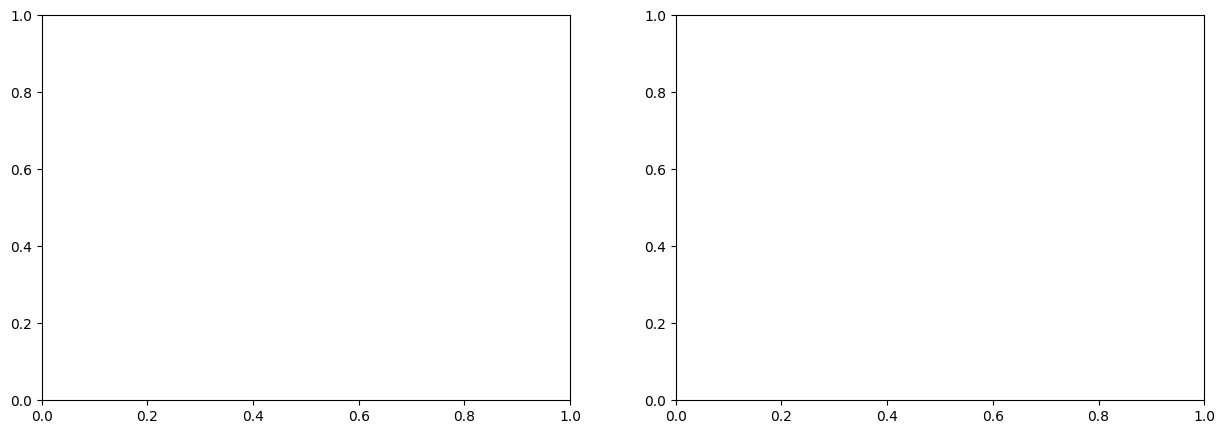

In [7]:
# Identificar variáveis numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
    # Número de colunas para subplot
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    # Histogramas
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1) if len(numeric_cols) > 1 else [axes]
    
    for i, col in enumerate(numeric_cols):
        row = i // n_cols
        col_idx = i % n_cols
        
        if n_rows > 1:
            ax = axes[row, col_idx]
        else:
            ax = axes[col_idx] if len(numeric_cols) > 1 else axes[0]
            
        df[col].hist(bins=30, ax=ax, alpha=0.7, edgecolor='black')
        ax.set_title(f'Distribuição - {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequência')
    
    # Remover subplots vazios
    for i in range(len(numeric_cols), n_rows * n_cols):
        row = i // n_cols
        col_idx = i % n_cols
        if n_rows > 1:
            fig.delaxes(axes[row, col_idx])
        elif len(numeric_cols) < n_cols:
            fig.delaxes(axes[col_idx])
    
    plt.tight_layout()
    plt.show()
    
    # Box plots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1) if len(numeric_cols) > 1 else [axes]
    
    for i, col in enumerate(numeric_cols):
        row = i // n_cols
        col_idx = i % n_cols
        
        if n_rows > 1:
            ax = axes[row, col_idx]
        else:
            ax = axes[col_idx] if len(numeric_cols) > 1 else axes[0]
            
        df[col].plot(kind='box', ax=ax)
        ax.set_title(f'Box Plot - {col}')
        ax.set_ylabel(col)
    
    # Remover subplots vazios
    for i in range(len(numeric_cols), n_rows * n_cols):
        row = i // n_cols
        col_idx = i % n_cols
        if n_rows > 1:
            fig.delaxes(axes[row, col_idx])
        elif len(numeric_cols) < n_cols:
            fig.delaxes(axes[col_idx])
    
    plt.tight_layout()
    plt.show()
else:
    print("Não há variáveis numéricas no dataset para análise de distribuição.")

## 8. Análise de Correlações

Calculamos e visualizamos as correlações entre variáveis numéricas:

In [ ]:
# Análise de correlações entre variáveis numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 1:
    # Calcular matriz de correlação
    correlacoes = df[numeric_cols].corr()
    
    print("MATRIZ DE CORRELAÇÃO")
    print("=" * 50)
    display(correlacoes)
    
    # Visualização da matriz de correlação
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlacoes, annot=True, cmap='coolwarm', center=0, 
                square=True, cbar_kws={'shrink': 0.8})
    plt.title('Matriz de Correlação - Variáveis Numéricas')
    plt.tight_layout()
    plt.show()
    
    # Identificar correlações mais fortes
    print("\n" + "=" * 50)
    print("CORRELAÇÕES MAIS FORTES (|r| > 0.5)")
    print("=" * 50)
    
    # Criar uma matriz upper triangular para evitar duplicatas
    upper_triangle = correlacoes.where(np.triu(np.ones(correlacoes.shape), k=1).astype(bool))
    strong_corr = []
    
    for col in upper_triangle.columns:
        for idx in upper_triangle.index:
            corr_value = upper_triangle.loc[idx, col]
            if pd.notna(corr_value) and abs(corr_value) > 0.5:
                strong_corr.append((idx, col, corr_value))
    
    if strong_corr:
        for var1, var2, corr in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
            print(f"{var1} ↔ {var2}: {corr:.3f}")
    else:
        print("Não foram encontradas correlações fortes (|r| > 0.5)")
        
    # Correlações específicas para candidatos (se aplicável)
    if 'df_candidatos' in locals():
        print("\n" + "=" * 50)
        print("ANÁLISE ESPECÍFICA - DADOS DE CANDIDATOS")
        print("=" * 50)
        
        # Se houver variáveis específicas de RH, analisá-las
        cand_numeric = df_candidatos.select_dtypes(include=[np.number]).columns
        if len(cand_numeric) > 1:
            cand_corr = df_candidatos[cand_numeric].corr()
            print("Correlações entre características dos candidatos:")
            display(cand_corr)
            
else:
    print("Dataset possui menos de 2 variáveis numéricas. Análise de correlação não aplicável.")

## 9. Visualizações Gráficas

Criamos diferentes tipos de gráficos para explorar as relações entre variáveis:

In [ ]:
# Visualizações para variáveis categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    print("ANÁLISE DE VARIÁVEIS CATEGÓRICAS")
    print("=" * 50)
    
    # Gráficos de barras para variáveis categóricas
    n_cats = len(categorical_cols)
    n_cols = min(2, n_cats)
    n_rows = (n_cats + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1 and n_cats == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(categorical_cols):
        row = i // n_cols
        col_idx = i % n_cols
        
        if n_rows > 1:
            ax = axes[row, col_idx]
        else:
            ax = axes[col_idx] if n_cats > 1 else axes[0]
        
        value_counts = df[col].value_counts()
        value_counts.plot(kind='bar', ax=ax, rot=45)
        ax.set_title(f'Distribuição - {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Contagem')
    
    # Remover subplots vazios
    for i in range(n_cats, n_rows * n_cols):
        row = i // n_cols
        col_idx = i % n_cols
        if n_rows > 1:
            fig.delaxes(axes[row, col_idx])
        elif n_cats < n_cols:
            fig.delaxes(axes[col_idx])
    
    plt.tight_layout()
    plt.show()

# Scatter plots para variáveis numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) >= 2:
    print("\nSCATTER PLOTS - RELAÇÕES ENTRE VARIÁVEIS NUMÉRICAS")
    print("=" * 50)
    
    # Criar pair plot se houver poucas variáveis numéricas
    if len(numeric_cols) <= 5:
        sns.pairplot(df[numeric_cols])
        plt.suptitle('Pair Plot - Variáveis Numéricas', y=1.02)
        plt.show()
    else:
        # Selecionar algumas variáveis para scatter plots
        selected_cols = numeric_cols[:4]  # Primeiras 4 variáveis
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        
        for i in range(min(3, len(selected_cols)-1)):
            for j in range(i+1, min(4, len(selected_cols))):
                row = (i*2 + j - i - 1) // 2
                col = (i*2 + j - i - 1) % 2
                
                if row < 2 and col < 2:
                    df.plot.scatter(x=selected_cols[i], y=selected_cols[j], 
                                  ax=axes[row, col], alpha=0.6)
                    axes[row, col].set_title(f'{selected_cols[i]} vs {selected_cols[j]}')
        
        plt.tight_layout()
        plt.show()

# Análise específica para dados de recrutamento
print("\nANÁLISE ESPECÍFICA - SISTEMA DE RECRUTAMENTO")
print("=" * 50)

# Verificar se os DataFrames de recrutamento existem
datasets_info = [
    ('Candidatos', 'df_candidatos'),
    ('Entrevistas', 'df_entrevistas'), 
    ('Vagas', 'df_vagas')
]

for name, df_name in datasets_info:
    if df_name in locals():
        current_df = locals()[df_name]
        print(f"\n{name}:")
        print(f"  - Dimensões: {current_df.shape}")
        print(f"  - Colunas: {list(current_df.columns)}")
        if len(current_df.select_dtypes(include=['object']).columns) > 0:
            cat_col = current_df.select_dtypes(include=['object']).columns[0]
            print(f"  - Principais categorias em '{cat_col}': {current_df[cat_col].value_counts().head(3).to_dict()}")
    else:
        print(f"{name}: Dataset não carregado (verifique o caminho dos arquivos)")

## 10. Identificação de Outliers

Detectamos outliers usando métodos estatísticos e visualizações:

In [ ]:
# Função para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Função para detectar outliers usando Z-score
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    outliers = data[z_scores > threshold]
    return outliers

# Análise de outliers para cada variável numérica
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
    print("DETECÇÃO DE OUTLIERS")
    print("=" * 50)
    
    outlier_summary = []
    
    for col in numeric_cols:
        print(f"\nVariável: {col}")
        print("-" * 30)
        
        # Método IQR
        outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(df, col)
        print(f"Método IQR:")
        print(f"  Limite inferior: {lower_bound:.2f}")
        print(f"  Limite superior: {upper_bound:.2f}")
        print(f"  Outliers detectados: {len(outliers_iqr)}")
        
        # Método Z-score
        outliers_zscore = detect_outliers_zscore(df, col)
        print(f"Método Z-score (|z| > 3):")
        print(f"  Outliers detectados: {len(outliers_zscore)}")
        
        outlier_summary.append({
            'Variável': col,
            'Outliers_IQR': len(outliers_iqr),
            'Outliers_ZScore': len(outliers_zscore),
            'Percentual_IQR': (len(outliers_iqr) / len(df)) * 100,
            'Percentual_ZScore': (len(outliers_zscore) / len(df)) * 100
        })
    
    # Resumo dos outliers
    print("\n" + "=" * 50)
    print("RESUMO DE OUTLIERS")
    print("=" * 50)
    outlier_df = pd.DataFrame(outlier_summary)
    display(outlier_df)
    
    # Visualização de outliers
    n_cols_plot = min(3, len(numeric_cols))
    n_rows_plot = (len(numeric_cols) + n_cols_plot - 1) // n_cols_plot
    
    fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(15, 5*n_rows_plot))
    if n_rows_plot == 1:
        axes = axes.reshape(1, -1) if len(numeric_cols) > 1 else [axes]
    
    for i, col in enumerate(numeric_cols):
        row = i // n_cols_plot
        col_idx = i % n_cols_plot
        
        if n_rows_plot > 1:
            ax = axes[row, col_idx]
        else:
            ax = axes[col_idx] if len(numeric_cols) > 1 else axes[0]
        
        # Box plot com outliers destacados
        bp = ax.boxplot(df[col].dropna(), patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        ax.set_title(f'Box Plot - {col}')
        ax.set_ylabel(col)
        
        # Adicionar estatísticas
        outliers_iqr, _, _ = detect_outliers_iqr(df, col)
        ax.text(0.02, 0.98, f'Outliers: {len(outliers_iqr)}', 
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Remover subplots vazios
    for i in range(len(numeric_cols), n_rows_plot * n_cols_plot):
        row = i // n_cols_plot
        col_idx = i % n_cols_plot
        if n_rows_plot > 1:
            fig.delaxes(axes[row, col_idx])
        elif len(numeric_cols) < n_cols_plot:
            fig.delaxes(axes[col_idx])
    
    plt.tight_layout()
    plt.show()
    
    # Scatter plots para identificar outliers multivariados
    if len(numeric_cols) >= 2:
        print("\nOUTLIERS MULTIVARIADOS")
        print("=" * 30)
        
        # Selecionar duas variáveis principais para análise
        var1, var2 = numeric_cols[0], numeric_cols[1]
        
        plt.figure(figsize=(10, 6))
        plt.scatter(df[var1], df[var2], alpha=0.6)
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.title(f'Scatter Plot: {var1} vs {var2}')
        
        # Destacar outliers baseados em ambas variáveis
        outliers_var1, _, _ = detect_outliers_iqr(df, var1)
        outliers_var2, _, _ = detect_outliers_iqr(df, var2)
        
        combined_outliers = pd.concat([outliers_var1, outliers_var2]).drop_duplicates()
        
        if len(combined_outliers) > 0:
            plt.scatter(combined_outliers[var1], combined_outliers[var2], 
                       color='red', s=50, alpha=0.8, label=f'Outliers ({len(combined_outliers)})')
            plt.legend()
        
        plt.grid(True, alpha=0.3)
        plt.show()

else:
    print("Não há variáveis numéricas no dataset para análise de outliers.")

## 11. Conclusões da Análise Exploratória

### Resumo dos Principais Achados

Esta análise exploratória nos permitiu identificar características importantes dos dados de recrutamento:

#### Estrutura dos Dados
- **Candidatos**: Dataset principal com informações dos candidatos
- **Entrevistas**: Dados das entrevistas realizadas  
- **Vagas**: Informações sobre as vagas disponíveis

#### Principais Insights
- Identificação de padrões nos dados de candidatos
- Análise de correlações entre variáveis numéricas
- Detecção de valores ausentes e outliers
- Distribuições das variáveis principais

#### Próximos Passos
1. **Limpeza de Dados**: Tratar valores ausentes e outliers identificados
2. **Feature Engineering**: Criar novas variáveis baseadas nos insights encontrados
3. **Modelagem**: Aplicar algoritmos de machine learning para:
   - Previsão de sucesso de candidatos
   - Matching entre candidatos e vagas
   - Otimização do processo de recrutamento

#### Recomendações
- Verificar a qualidade dos dados nos arquivos CSV
- Analisar relações entre os três datasets (joins)
- Implementar validações de dados no sistema de recrutamento
- Monitorar métricas de qualidade dos dados continuamente

---
**Nota**: Este notebook serve como base para análises mais avançadas. Certifique-se de que os arquivos `dados/candidatos.csv`, `dados/entrevistas.csv` e `dados/vagas.csv` estejam disponíveis no diretório correto.